Net(
  (fc1): Linear(in_features=2, out_features=1, bias=False)
)
[Parameter containing:
tensor([[ 1., -1.]], requires_grad=True)]
Epoch 0 - loss: 150.3333282470703
Epoch 1 - loss: 147.64195251464844
Epoch 2 - loss: 143.67684936523438
Epoch 3 - loss: 139.16600036621094
Epoch 4 - loss: 134.47560119628906
Epoch 5 - loss: 129.78675842285156
Epoch 6 - loss: 125.18692779541016
Epoch 7 - loss: 120.71662139892578
Epoch 8 - loss: 116.3929214477539
Epoch 9 - loss: 112.22126007080078
Epoch 10 - loss: 108.2014389038086
Epoch 290 - loss: 5.478365421295166
Epoch 291 - loss: 5.478282928466797
Epoch 292 - loss: 5.478204727172852
Epoch 293 - loss: 5.478127956390381
Epoch 294 - loss: 5.47805643081665
Epoch 295 - loss: 5.47798490524292
Epoch 296 - loss: 5.4779181480407715
Epoch 297 - loss: 5.477851867675781
Epoch 298 - loss: 5.477789402008057
Epoch 299 - loss: 5.477729797363281
when x = tensor([1., 3.]), y = tensor([3.5536], grad_fn=<SqueezeBackward4>)
when x = tensor([2., 6.]), y = tensor([7.1072], gra

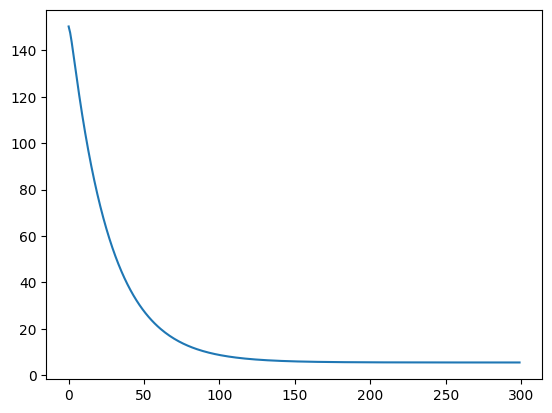

In [1]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
import matplotlib.pyplot as plt

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2,1,bias=False)
    def forward(self, x):
        x = self.fc1(x)
        return x

net = Net()
print(net)


net.fc1.weight = torch.nn.Parameter(torch.tensor([[1., -1.]], requires_grad=True))

print(list(net.parameters()))

#input = torch.randn(1,2)
#out = net(input)


criterion = nn.MSELoss()
#def criterion(out, label):
#    return ((label - out)**2).mean()


optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.5)
#optimizer = optim.Adam(net.parameters(), lr=0.005)


data = torch.tensor([[1.,3.], [2.,6.], [3.,9.]], dtype=torch.float)
target = torch.tensor([[1.],[5.],[13.]], dtype=torch.float)

hist = []

############## Batch GD based update ##############       

num_epochs = 300
verbosity = 0
for epoch in range(num_epochs):   
    optimizer.zero_grad()
    outputs = net(data)
    loss = criterion(outputs, target)
    loss.backward()
    hist.append(loss.detach())
    optimizer.step()
    if verbosity == 0:
        if epoch <= 10 or epoch >= (num_epochs - 10):
            print("Epoch {} - loss: {}".format(epoch, loss))
    else:
        print("Epoch {} - loss: {}".format(epoch, loss))
####################################################

### Test the trained network ###
for i, current_data in enumerate(data):
    out = net(current_data)  
    print("when x = {}, y = {}".format(current_data, out))
    
plt.plot(hist, label = "training curve")

Net(
  (fc1): Linear(in_features=2, out_features=1, bias=False)
)
[Parameter containing:
tensor([[ 1., -1.]], requires_grad=True)]
tensor([1., 3.])
tensor([2., 6.])
tensor([3., 9.])
Epoch 0 - loss: 355.8936767578125
Epoch 1 - loss: 325.486083984375
Epoch 2 - loss: 294.8541564941406
Epoch 3 - loss: 266.9310302734375
Epoch 4 - loss: 241.7991485595703
Epoch 5 - loss: 219.21153259277344
Epoch 6 - loss: 198.9071044921875
Epoch 7 - loss: 180.64755249023438
Epoch 8 - loss: 164.2194061279297
Epoch 9 - loss: 149.4318389892578
Epoch 10 - loss: 136.11444091796875
Epoch 290 - loss: 5.268443584442139
Epoch 291 - loss: 5.268443584442139
Epoch 292 - loss: 5.268443584442139
Epoch 293 - loss: 5.268443584442139
Epoch 294 - loss: 5.268443584442139
Epoch 295 - loss: 5.268443584442139
Epoch 296 - loss: 5.268443584442139
Epoch 297 - loss: 5.268443584442139
Epoch 298 - loss: 5.268443584442139
Epoch 299 - loss: 5.268443584442139
when x = tensor([1., 3.]), y = tensor([3.5776], grad_fn=<SqueezeBackward4>)
when 

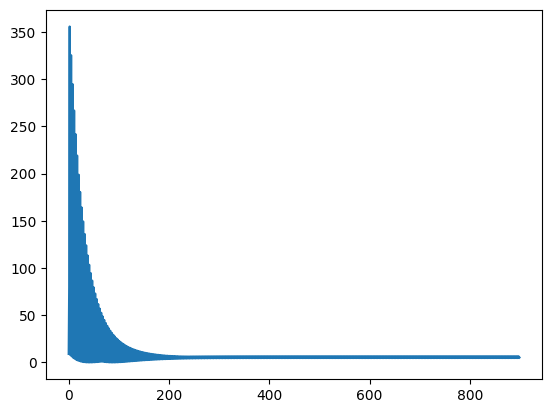

In [3]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
import matplotlib.pyplot as plt

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(2,1,bias=False)
    def forward(self, x):
        x = self.fc1(x)
        return x

net = Net()
print(net)


net.fc1.weight = torch.nn.Parameter(torch.tensor([[1., -1.]], requires_grad=True))

print(list(net.parameters()))

#input = torch.randn(1,2)
#out = net(input)


criterion = nn.MSELoss()
#def criterion(out, label):
#    return ((label - out)**2).mean()


optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.5)
#optimizer = optim.Adam(net.parameters(), lr=0.005)


data = torch.tensor([[1.,3.], [2.,6.], [3.,9.]], dtype=torch.float)
target = torch.tensor([[1.],[5.],[13.]], dtype=torch.float)

for i in data:
    print(i)

hist = []

############## SGD based update ##############       

num_epochs = 300
verbosity = 0
for epoch in range(num_epochs):
    for i in range(len(data)):
        X = data[i]
        Y = target[i]
        optimizer.zero_grad()
        outputs = net(X)
        loss = criterion(outputs, Y)
        loss.backward()
        hist.append(loss.detach())
        optimizer.step()
    if verbosity == 0:
        if epoch <= 10 or epoch >= (num_epochs - 10):
            print("Epoch {} - loss: {}".format(epoch, loss))
    else:
        print("Epoch {} - loss: {}".format(epoch, loss))
####################################################

### Test the trained network ###
for i, current_data in enumerate(data):
    out = net(current_data)  
    print("when x = {}, y = {}".format(current_data, out))
    
plt.plot(hist, label = "training curve")